## Visual exploratory data analysis

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.

### Tallying violations by district
The state of Rhode Island is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the "K" zones, which you'll examine further in the next exercise.

In [6]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('Traffic stops in Rhode Island.csv')

# Create a frequency table of districts and violations
print(pd.crosstab(ri.district,ri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district,ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          673              1254    290                  120          0   
Zone K2         1217              2242    812                  488         56   
Zone K3         1490              2211    603                  410         88   
Zone X1          192               496    100                   17         14   
Zone X3         1294              2241    633                  429        101   
Zone X4         2548              4367   1317                 1078        116   

violation  Speeding  
district             
Zone K1        5960  
Zone K2        7985  
Zone K3        9995  
Zone X1         906  
Zone X3        7176  
Zone X4        7683  
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1      

### Plotting violations by district
Now that you've created a frequency table focused on the "K" zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a bar plot, which is an appropriate plot type since you're comparing categorical data. Then you'll create a stacked bar plot in order to get a slightly different look at the data. Which plot do you find to be more insightful?

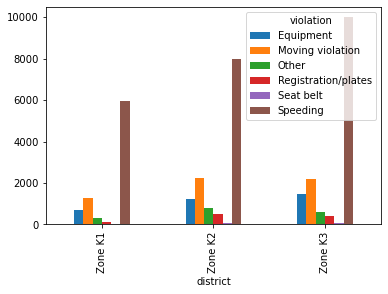

In [8]:
import matplotlib.pyplot as plt 

# Create a bar plot of 'k_zones'
k_zones.plot(kind = 'bar')

# Display the plot
plt.show()

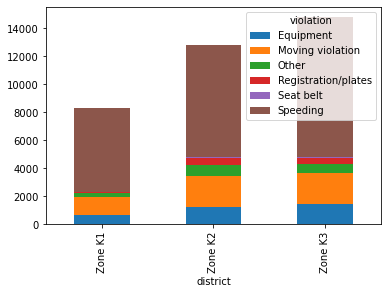

In [9]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind ='bar', stacked =True)

# Display the plot
plt.show()

### Converting stop durations to numbers
In the traffic stops dataset, the stop_duration column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as '0-15 Min'. How can you make this data easier to analyze?

In this exercise, you'll convert the stop durations to integers. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

1. Convert '0-15 Min' to 8
2. Convert '16-30 Min' to 23
3. Convert '30+ Min' to 45

In [10]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' nan '30+ Min']
[ 8. 23. nan 45.]


### Plotting stop length
If you were stopped for a particular violation, how long might you expect to be detained?

In this exercise, you'll visualize the average length of time drivers are stopped for each type of violation. Rather than using the violation column in this exercise, you'll use violation_raw since it contains more detailed descriptions of the violations.

violation_raw
APB                                 20.014706
Call for Service                    24.551502
Equipment/Inspection Violation      12.294308
Motorist Assist/Courtesy            18.147651
Other Traffic Violation             14.642963
Registration Violation              15.482691
Seatbelt Violation                  10.869333
Special Detail/Directed Patrol      14.775826
Speeding                            10.806045
Suspicious Person                   15.075000
Violation of City/Town Ordinance    13.707317
Warrant                             27.545455
Name: stop_minutes, dtype: float64


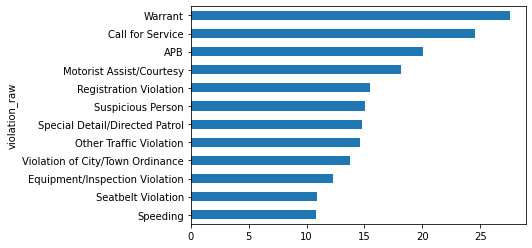

In [11]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values()

# Display the plot
stop_length.sort_values().plot(kind = 'barh')
plt.show()